In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from geopy.geocoders import Nominatim
import re
from haversine import haversine

In [2]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [24]:
df = pd.read_csv('./data/data_set/맛집 인접역 추가(전체).csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수,평점,위도,경도,인접역,인접역까지의거리
0,뽀르께노 스페니쉬비스트로,4.6,성북구,서울특별시 성북구 동소문로6길 4-21 1F,다국적음식,만원-2만원,2022-07-22,맛있다,7.0,7.0,0.0,0.0,4.600000,37.588018,127.008705,성신여대입구,0.412766
1,성북동집,4.5,성북구,서울특별시 성북구 성북로24길 4,한식,만원-2만원,2022-07-28,맛있다,41.0,35.0,6.0,0.0,3.841463,37.594813,126.996092,성신여대입구,1.330799
2,계모임,4.5,성북구,서울특별시 성북구 보문로30라길 5-10 1F,한식,만원-2만원,5 일 전,맛있다,10.0,10.0,0.0,0.0,4.500000,37.589844,127.018918,한성대입구,0.409768
3,옥돌,4.5,성북구,서울특별시 성북구 동소문로17길 11,양식,만원-2만원,2022-07-18,맛있다,5.0,5.0,0.0,0.0,4.500000,37.593999,127.015822,한성대입구,0.437159
4,우정초밥,4.4,성북구,서울특별시 성북구 종암로3길 31 1F,일식,2만원-3만원,2022-06-18,맛있다,31.0,28.0,3.0,0.0,3.974194,37.592923,127.033523,청량리,0.666402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,고바우덩어리생고기,4.2,구로구,서울특별시 구로구 부일로1길 9,한식,만원-2만원,2022-07-25,맛있다,6.0,6.0,0.0,0.0,4.200000,37.495986,126.817216,온수,0.723840
767,춘자싸롱,4.7,구로구,서울특별시 구로구 디지털로32나길 11,한식,만원-2만원,2020-10-15,맛있다,14.0,13.0,1.0,0.0,4.364286,37.484729,126.901442,구로디지털단지,0.044818
768,부뚜막청국장,4.0,구로구,서울특별시 구로구 구로중앙로28길 24,한식,만원-2만원,2021-06-16,맛있다,11.0,10.0,1.0,0.0,3.636364,37.500891,126.890202,구로,0.786433
769,이미커피,4.7,구로구,서울특별시 구로구 디지털로27길 116 101호,카페/디저트,만원 미만,2021-09-13,맛있다,4.0,4.0,0.0,0.0,4.700000,37.484090,126.890270,남구로,0.490202


In [4]:
campus = pd.read_csv('./data/서울시대학교.csv')
campus

,연도,학제,대학원구분,학교명,학교상태,본분교,시도,시군구,설립,주야구분,주소
0,2021,대학교,,서울대학교,기존,본교,서울,서울 관악구,국립대법인,주간,"서울특별시 관악구 관악로 1 (신림동, 서울대학교)"
1,2021,대학교,,한국체육대학교,기존,본교,서울,서울 송파구,국립,주간,"서울특별시 송파구 양재대로 1239 (방이동, 한국체육대학교)"
2,2021,대학교,,서울과학기술대학교,기존,본교,서울,서울 노원구,국립,주야간,"서울특별시 노원구 공릉로 232 (공릉동, 서울과학기술대학교)"
3,2021,대학교,,서울시립대학교,기존,본교,서울,서울 동대문구,공립,주간,"서울특별시 동대문구 서울시립대로 163 (전농동, 서울시립대학교)"
4,2021,대학교,,감리교신학대학교,기존,본교,서울,서울 서대문구,사립,주간,"서울특별시 서대문구 독립문로 56 (냉천동, 감리교신학대학)"
...,...,...,...,...,...,...,...,...,...,...,...
61,2021,사이버대학(대학),,한양사이버대학교,기존,본교,서울,서울 성동구,사립,원격,"서울특별시 성동구 왕십리로 220 (행당동, 한양사이버대학교)"
62,2021,사이버대학(대학),,사이버한국외국어대학교,기존,본교,서울,서울 동대문구,사립,원격,"서울특별시 동대문구 이문로 107 (이문동, 한국외국어대학교)"
63,2021,각종대학(대학),,한국예술종합학교,기존,본교,서울,서울 성북구,특별법국립,주간,"서울특별시 성북구 화랑로32길 146-37 (석관동, 한국종합예술학교)"
64,2021,기능대학,,한국폴리텍대학 서울정수캠퍼스,기존,본교,서울,서울 용산구,사립,주야간,"서울특별시 용산구 보광로 73 (보광동, 한국폴리텍1대학서울정수캠퍼스)"


In [8]:
campus['시군구']=campus['시군구'].str.replace('서울 ','')
campus.rename(columns = {'시군구' : '구'}, inplace = True)

KeyError: '시군구'

In [10]:
campus = campus[['학교명', '구', '주소']]
campus

,학교명,구,주소
0,서울대학교,관악구,"서울특별시 관악구 관악로 1 (신림동, 서울대학교)"
1,한국체육대학교,송파구,"서울특별시 송파구 양재대로 1239 (방이동, 한국체육대학교)"
2,서울과학기술대학교,노원구,"서울특별시 노원구 공릉로 232 (공릉동, 서울과학기술대학교)"
3,서울시립대학교,동대문구,"서울특별시 동대문구 서울시립대로 163 (전농동, 서울시립대학교)"
4,감리교신학대학교,서대문구,"서울특별시 서대문구 독립문로 56 (냉천동, 감리교신학대학)"
...,...,...,...
61,한양사이버대학교,성동구,"서울특별시 성동구 왕십리로 220 (행당동, 한양사이버대학교)"
62,사이버한국외국어대학교,동대문구,"서울특별시 동대문구 이문로 107 (이문동, 한국외국어대학교)"
63,한국예술종합학교,성북구,"서울특별시 성북구 화랑로32길 146-37 (석관동, 한국종합예술학교)"
64,한국폴리텍대학 서울정수캠퍼스,용산구,"서울특별시 용산구 보광로 73 (보광동, 한국폴리텍1대학서울정수캠퍼스)"


In [11]:
for i in range(0, len(campus)):
    pattern = r'\([^)]*\)'
    x = campus.loc[i, '주소']
    text = re.sub(pattern=pattern, repl='', string= x)

    campus.loc[i, '주소'] = ' '.join(text.split())

C:\Users\HYUNJIN\AppData\Local\Temp\ipykernel_12852\3018507262.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campus.loc[i, '주소'] = ' '.join(text.split())


In [12]:
campus

,학교명,구,주소
0,서울대학교,관악구,서울특별시 관악구 관악로 1
1,한국체육대학교,송파구,서울특별시 송파구 양재대로 1239
2,서울과학기술대학교,노원구,서울특별시 노원구 공릉로 232
3,서울시립대학교,동대문구,서울특별시 동대문구 서울시립대로 163
4,감리교신학대학교,서대문구,서울특별시 서대문구 독립문로 56
...,...,...,...
61,한양사이버대학교,성동구,서울특별시 성동구 왕십리로 220
62,사이버한국외국어대학교,동대문구,서울특별시 동대문구 이문로 107
63,한국예술종합학교,성북구,서울특별시 성북구 화랑로32길 146-37
64,한국폴리텍대학 서울정수캠퍼스,용산구,서울특별시 용산구 보광로 73


In [13]:
campus.to_csv('./data/서울시대학교(수정).csv')

In [16]:
campus = pd.read_csv('./data/서울시대학교(수정).csv')
campus.drop('Unnamed: 0', axis = 1, inplace = True)
campus

,학교명,구,주소
0,서울대학교,관악구,서울특별시 관악구 관악로 1
1,한국체육대학교,송파구,서울특별시 송파구 양재대로 1239
2,서울과학기술대학교,노원구,서울특별시 노원구 공릉로 232
3,서울시립대학교,동대문구,서울특별시 동대문구 서울시립대로 163
4,감리교신학대학교,서대문구,서울특별시 서대문구 독립문로 56
...,...,...,...
61,한양사이버대학교,성동구,서울특별시 성동구 왕십리로 220
62,사이버한국외국어대학교,동대문구,서울특별시 동대문구 이문로 107
63,한국예술종합학교,성북구,서울특별시 성북구 화랑로32길 146-37
64,한국폴리텍대학 서울정수캠퍼스,용산구,서울특별시 용산구 보광로 73


In [17]:
i = 0
address = []

for i in range(len(campus['주소'])):
    a = campus.loc[i, '주소'].split(' ')
    address.append(" ".join(a[0:4]))

In [18]:
geo_local = Nominatim(user_agent='South Korea')
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

In [19]:
latitude = []
longitude =[]
i = 0
for i in address:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])

In [22]:
i = 0
for i in range(0, len(campus)):
    campus.loc[i, '위도'] = latitude[i]
    campus.loc[i, '경도'] = longitude[i]
campus

,학교명,구,주소,위도,경도
0,서울대학교,관악구,서울특별시 관악구 관악로 1,37.458115,126.952161
1,한국체육대학교,송파구,서울특별시 송파구 양재대로 1239,37.511704,127.127950
2,서울과학기술대학교,노원구,서울특별시 노원구 공릉로 232,37.645220,127.066730
3,서울시립대학교,동대문구,서울특별시 동대문구 서울시립대로 163,37.583020,127.059175
4,감리교신학대학교,서대문구,서울특별시 서대문구 독립문로 56,37.567519,126.962223
...,...,...,...,...,...
61,한양사이버대학교,성동구,서울특별시 성동구 왕십리로 220,37.549734,127.044168
62,사이버한국외국어대학교,동대문구,서울특별시 동대문구 이문로 107,37.596963,127.058700
63,한국예술종합학교,성북구,서울특별시 성북구 화랑로32길 146-37,37.602189,127.059161
64,한국폴리텍대학 서울정수캠퍼스,용산구,서울특별시 용산구 보광로 73,37.530112,126.996560


In [23]:
campus.to_csv('./data/서울시대학교 좌표 추가.csv')

In [27]:
distance = []
for i in range(0, len(df)):
    for j in range(0, len(campus)):
        start = (float(campus.loc[j, '위도']), float(campus.loc[j, '경도'])) # (lat, lon)
        goal = (float(df.loc[i, '위도']), float(df.loc[i, '경도']))
        distance.append(haversine(start, goal))
        
    df.loc[i, '인접대학교'] = campus.loc[distance.index(min(distance)), '학교명']
    df.loc[i, '인접대학교까지의거리'] = min(distance)
    distance = []

In [28]:
df

,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수,평점,위도,경도,인접역,인접역까지의거리,인접대학교,인접대학교까지의거리
0,뽀르께노 스페니쉬비스트로,4.6,성북구,서울특별시 성북구 동소문로6길 4-21 1F,다국적음식,만원-2만원,2022-07-22,맛있다,7.0,7.0,0.0,0.0,4.600000,37.588018,127.008705,성신여대입구,0.412766,한성대학교,0.571620
1,성북동집,4.5,성북구,서울특별시 성북구 성북로24길 4,한식,만원-2만원,2022-07-28,맛있다,41.0,35.0,6.0,0.0,3.841463,37.594813,126.996092,성신여대입구,1.330799,성균관대학교,0.988781
2,계모임,4.5,성북구,서울특별시 성북구 보문로30라길 5-10 1F,한식,만원-2만원,5 일 전,맛있다,10.0,10.0,0.0,0.0,4.500000,37.589844,127.018918,한성대입구,0.409768,성신여자대학교,0.349572
3,옥돌,4.5,성북구,서울특별시 성북구 동소문로17길 11,양식,만원-2만원,2022-07-18,맛있다,5.0,5.0,0.0,0.0,4.500000,37.593999,127.015822,한성대입구,0.437159,성신여자대학교,0.486999
4,우정초밥,4.4,성북구,서울특별시 성북구 종암로3길 31 1F,일식,2만원-3만원,2022-06-18,맛있다,31.0,28.0,3.0,0.0,3.974194,37.592923,127.033523,청량리,0.666402,고려대학교,0.420217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,고바우덩어리생고기,4.2,구로구,서울특별시 구로구 부일로1길 9,한식,만원-2만원,2022-07-25,맛있다,6.0,6.0,0.0,0.0,4.200000,37.495986,126.817216,온수,0.723840,성공회대학교,1.200217
767,춘자싸롱,4.7,구로구,서울특별시 구로구 디지털로32나길 11,한식,만원-2만원,2020-10-15,맛있다,14.0,13.0,1.0,0.0,4.364286,37.484729,126.901442,구로디지털단지,0.044818,동양미래대학교,3.010617
768,부뚜막청국장,4.0,구로구,서울특별시 구로구 구로중앙로28길 24,한식,만원-2만원,2021-06-16,맛있다,11.0,10.0,1.0,0.0,3.636364,37.500891,126.890202,구로,0.786433,동양미래대학교,1.069202
769,이미커피,4.7,구로구,서울특별시 구로구 디지털로27길 116 101호,카페/디저트,만원 미만,2021-09-13,맛있다,4.0,4.0,0.0,0.0,4.700000,37.484090,126.890270,남구로,0.490202,동양미래대학교,2.936035


In [30]:
df.to_csv('./data/맛집 데이터 인접 대학교 추가.csv')

In [34]:
ex1 = pd.DataFrame(df.인접대학교까지의거리.value_counts())
ex1.rename(columns = {'인접대학교까지의거리' : '인접대학수'}, inplace = True)
ex1['인접대학교까지의거리'] = ex1.index

ex1 = ex1.sort_values('인접대학교까지의거리')
ex1.reset_index(inplace = True, drop=True)
ex1

,인접대학수,인접대학교까지의거리
0,4,0.000000
1,1,0.099431
2,1,0.139850
3,3,0.164766
4,1,0.165742
...,...,...
589,1,3.866605
590,1,3.896742
591,1,3.967395
592,1,4.290632


In [40]:
tmp = ex1[ex1['인접대학수'] == 7].index
ex1 = ex1.drop(tmp)

In [36]:
dis = ex1['인접대학교까지의거리'].to_list()
data = dis
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]
labels = ['0.5이하', '1이하', '1.5이하', '2이하', '2.5이하', '3이하', '3.5이하', '4이하', '4.5이하']

In [41]:
cats = pd.cut(data, bins, labels = labels)
cat_list = list(cats)
cat_list

[nan,
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',
 '1이하',


In [45]:
from collections import Counter
a = []
b = []
result = Counter(cat_list)

for key in result:
    a.append(key)
    b.append(result[key])

df_dis = pd.DataFrame((zip(a, b)), columns = ['거리', '수'])
df_dis = df_dis.drop(0, axis = 0)
df_dis

,거리,수
1,0.5이하,73
2,1이하,198
3,1.5이하,115
4,2이하,93
5,2.5이하,44
6,3이하,37
7,3.5이하,15
8,4이하,14
9,4.5이하,1


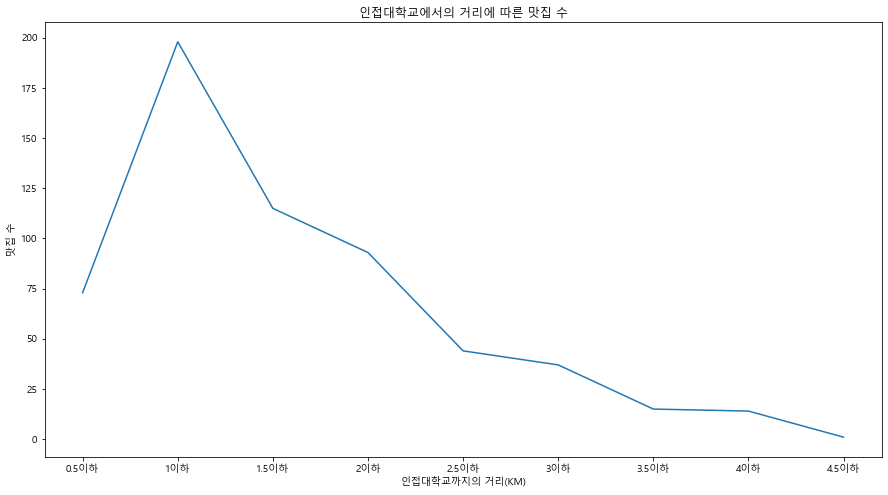

In [46]:
plt.figure(figsize=(15, 8))
plt.plot(df_dis['거리'], df_dis['수'])

plt.xlabel('인접대학교까지의 거리(KM)')
plt.ylabel('맛집 수')
plt.title('인접대학교에서의 거리에 따른 맛집 수')
plt.show()